In [4]:
# Copyright 2019 The TensorFlow Authors All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [5]:
# Visualization of the YAMNet audio event classification model.
# See https://github.com/tensorflow/models/tree/master/research/audioset/yamnet/

In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Imports.
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt

import params
import yamnet as yamnet_model
import tensorflow as tf

import pyaudio
import wave

In [3]:
# Read in the audio.
# You can get this example waveform via:
# curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

wav_file_name = 'speech_whistling2.wav'

wav_data, sr = sf.read(wav_file_name, dtype=np.int16)
waveform = wav_data / 32768.0
# The graph is designed for a sampling rate of 16 kHz, but higher rates 
# should work too.
params.SAMPLE_RATE = sr
print("Sample rate =", params.SAMPLE_RATE)

Sample rate = 16000


Recording


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


Finished recording


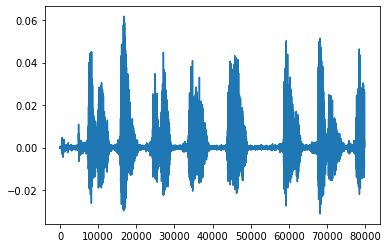

In [16]:
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 1
fs = 16000  # Record at 16000 samples per second
seconds = 3
p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

data = np.array([])   # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = np.append(data,np.fromstring(stream.read(chunk), dtype=np.int16))

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')
waveform = data / 32768.0
plt.plot(waveform)
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

In [13]:
# Set up the YAMNet model.
class_names = yamnet_model.class_names('yamnet_class_map.csv')
params.PATCH_HOP_SECONDS = 0.1  # 10 Hz scores frame rate.
graph = tf.Graph()
with graph.as_default():
    yamnet = yamnet_model.yamnet_frames_model(params)
    yamnet.load_weights('yamnet.h5')

In [17]:
# Run the model.
with graph.as_default():
    scores, spectrogram = yamnet.predict(np.reshape(waveform, [1, -1]), steps=1)

In [18]:
mean_scores = np.mean(scores, axis=0)
top_N = 3
top_class_indices = np.argsort(mean_scores)[::-1][:top_N]
top_class_value = np.sort(mean_scores)
for x in top_class_indices:
    print(class_names[x], " ", top_class_value[x])


Speech   0.0
Inside, small room   2.4074461e-05
Narration, monologue   0.0
